# Spectra analysis 

(Thanks for the help from Matt Nicholl and ChatGPT!!!)

This file is for analysing the spectra downloaded from TNS database.

In [28]:
import pandas as pd
import pylab as plt
import numpy as np


### 1. Class distribution
For each class, how many objects reside?

For each object, how many spectra gained?

In [29]:
spectra_info = pd.read_csv('all_TNS_spectra/all_wiserep_spectra.csv') #.set_index(' IAU name').to_dict('index')
spectra_info.head()



,Obj. ID,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
0,23311,SN 2023gkb,ZTF23aajkaka ATLAS23ism,322.753435,-3.981742,SN II,0.026181,77202,2023-05-19 09:35:34.00,2.460084e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-22 22:05:08
1,23221,SN 2023gjt,ATLAS23isa ZTF23aagnpbz,124.351590,51.732505,SN Ia,0.042554,77064,2023-05-09 03:49:21.00,2.460074e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-09 19:05:06
2,22953,SN 2023gjg,ATLAS23jkx ZTF23aagqyym,136.824882,37.503525,SN II,0.0308,69988,2023-04-23 05:52:00.00,2.460058e+06,...,--,--,3253.531807,10894.525977,2.530969,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06
3,22940,SN 2023ghu,ZTF23aagphxh ATLAS23iqp,148.046449,38.738469,SN Ia,0.06,69973,2023-04-24 05:32:18.00,2.460059e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-04-24 14:05:08
4,22952,AT 2023ghq,ZTF23aagunkc ATLAS23ipv,239.554365,8.906940,--,--,69987,2023-04-23 11:32:00.00,2.460058e+06,...,--,--,3253.531277,10892.923996,2.530438,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06


Replace some column names and value types. 

In [30]:
old_names = spectra_info.columns.to_list()
name_dict = {}
for i in old_names:
    name_dict[i] = i.strip().replace('. ', '_').replace('/', '').replace(' ', '_').replace('-', '_')
spectra_info = spectra_info.rename(columns = name_dict)

df_obj = spectra_info.select_dtypes('object')
spectra_info[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
spectra_info[['Redshift', 'JD', 'Obj_RA', 'Obj_DEC', 'Obj_ID']] = spectra_info[['Redshift', 'JD', 'Obj_RA', 'Obj_DEC', 'Obj_ID']].apply(pd.to_numeric, errors='coerce')
spectra_info


,Obj_ID,IAU_name,Internal_names,Obj_RA,Obj_DEC,Obj_Type,Redshift,Spec_ID,Obs_date,JD,...,Grating,Blaze,Lambda_min,Lambda_max,Del_Lambda,Contrib,Publish,Remarks,Created_by,Creation_date
0,23311,SN 2023gkb,ZTF23aajkaka ATLAS23ism,322.753435,-3.981742,SN II,0.026181,77202,2023-05-19 09:35:34.00,2.460084e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-22 22:05:08
1,23221,SN 2023gjt,ATLAS23isa ZTF23aagnpbz,124.351590,51.732505,SN Ia,0.042554,77064,2023-05-09 03:49:21.00,2.460074e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-09 19:05:06
2,22953,SN 2023gjg,ATLAS23jkx ZTF23aagqyym,136.824882,37.503525,SN II,0.030800,69988,2023-04-23 05:52:00.00,2.460058e+06,...,--,--,3253.531807,10894.525977,2.530969,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06
3,22940,SN 2023ghu,ZTF23aagphxh ATLAS23iqp,148.046449,38.738469,SN Ia,0.060000,69973,2023-04-24 05:32:18.00,2.460059e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-04-24 14:05:08
4,22952,AT 2023ghq,ZTF23aagunkc ATLAS23ipv,239.554365,8.906940,--,NaN,69987,2023-04-23 11:32:00.00,2.460058e+06,...,--,--,3253.531277,10892.923996,2.530438,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,22649,SN 2023bfv,ZTF18aaiwzie,223.733669,29.834549,SN Ia,0.086000,69096,2023-02-20 08:43:04.00,2.459996e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-20 15:05:06
11724,22634,SN 2023bfs,ATLAS23bvr ZTF23aabrson,211.239139,25.025240,SN II,0.035251,69080,2023-02-16 07:04:49.00,2.459992e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-17 19:05:06
11725,22601,SN 2023bfq,ZTF23aabrtmn,151.022013,27.314817,SN Ia,0.054000,69015,2023-02-10 06:35:54.00,2.459986e+06,...,--,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-10 15:05:06
11726,22620,AT 2023bfb,ATLAS23bqr,209.041483,5.036747,--,0.004230,69067,2023-02-02 20:22:51.00,2.459978e+06,...,--,--,3621.142578,8945.029297,2.860767,--,--,[TNS source group: 125 - LiONS ],TNS_Bot1,2023-02-17 02:05:06


In [31]:
spectra_info = spectra_info[~(spectra_info.Obj_Type == 'Computed-Ia')]
iau_names = list(set(spectra_info['IAU_name'].tolist()))
print('There are %i events in total.\n '% len(iau_names))

There are 10706 events in total.
 


How many samples have multiple spectra?

In [32]:
spec_num_df = spectra_info.groupby('IAU_name').size().sort_values(ascending=False).to_frame(name='spec_count')

# Filter to keep only rows where the size is 2 or more
spec_num_df = spec_num_df[spec_num_df['spec_count'] >= 2]

spec_num_df


,spec_count
IAU_name,
AT 2021ehb,17
SN 2020jfo,10
SN 2008J,10
AT 2020acka,9
AT 2019wey,7
...,...
AT 2019qyl,2
SN 2023ref,2
2022qmx,2


In [33]:
# save them to a new file
multi_spec_df = spectra_info[spectra_info.IAU_name.isin(spec_num_df.index)]
multi_spec_df = multi_spec_df.sort_values('IAU_name')
multi_spec_df.to_csv('sample_with_multi_spec.csv')

Text(0.5, 0, 'Num of spectra')

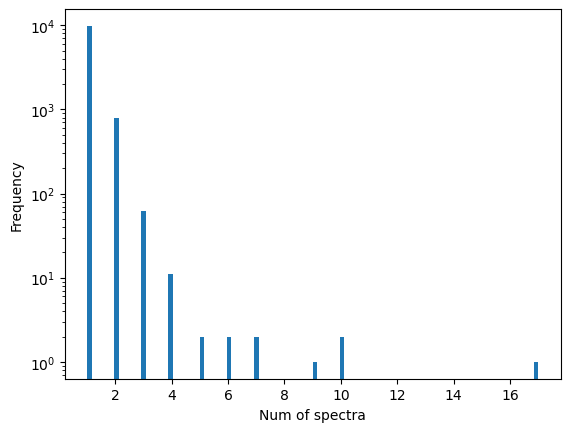

In [34]:
spectra_info.groupby('IAU_name').size().plot.hist(bins = 100)
plt.yscale('log')
plt.xlabel('Num of spectra')

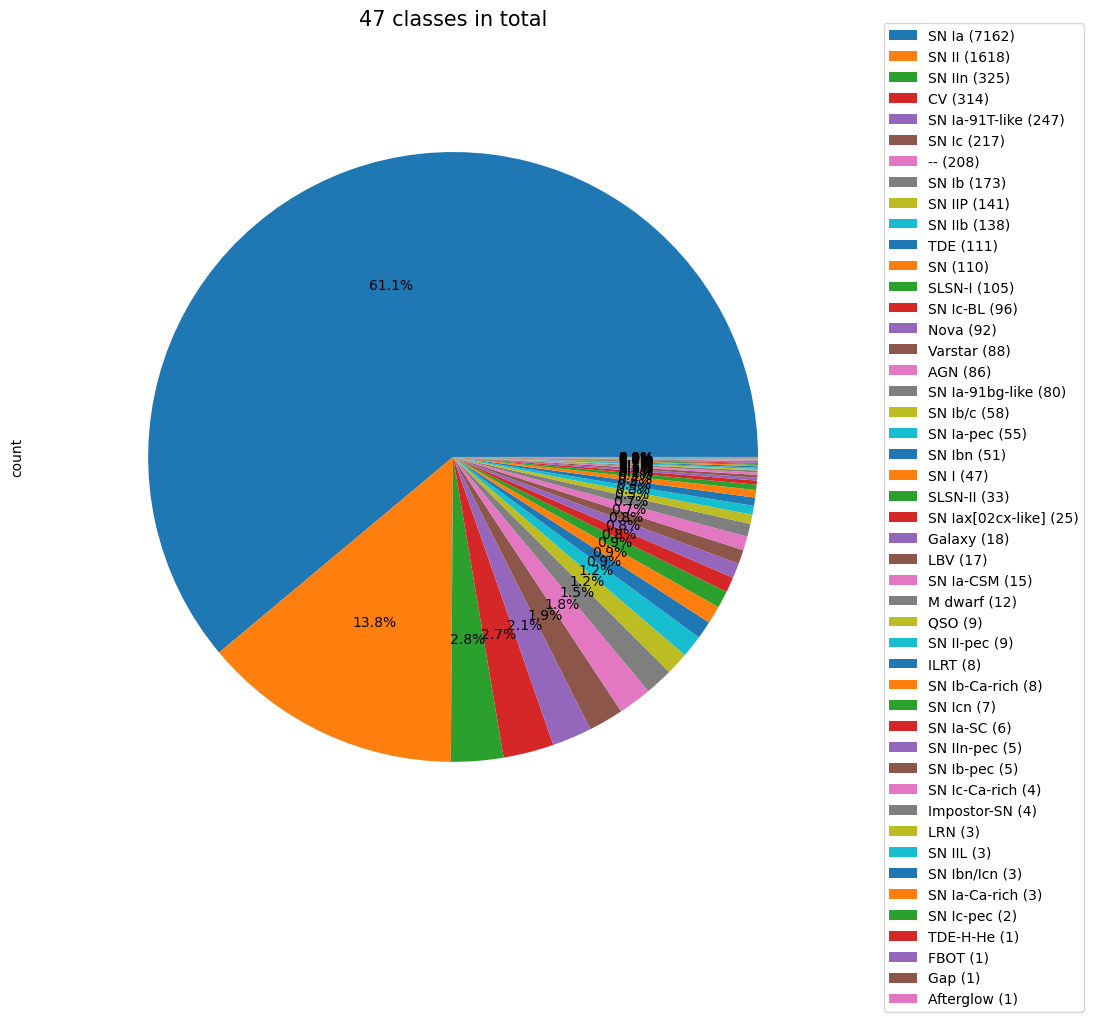

In [35]:

# Get unique object types and their counts
obj_type_counts = spectra_info['Obj_Type'].value_counts()

# Plot pie chart
ax = obj_type_counts.plot.pie(figsize=(11, 11), labeldistance=None, autopct='%1.1f%%', radius=0.9)

# Construct legend labels with counts
legend_labels = [f'{obj_type} ({count})' for obj_type, count in zip(obj_type_counts.index, obj_type_counts)]

# Add legend
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc='upper left')

# Set title
ax.set_title('%s classes in total' % (str(len(set(spectra_info['Obj_Type'])))), fontsize=15)

plt.show()




### General classes:

*Remove Computed-Ia.

| Main class    | Content | Num|
| -------- | ------- | ------- |
| SN Ia  |  SN Ia, SN Ia-91T-like, SN Ia-91bg-like, SN Ia-CSM,  SN Ia-Ca-rich,  SN Ia-SC, SN Ia-pec, SN Iax-02cx-like| 8 |
| SN II  | SN II, SN II-pec, SN IIL, SN IIP |4|
| Stripped Envelop SN | SN Ib, SN Ib-Ca-rich, SN Ib-pec, SN Ib/c, SN Ibn, SN Ibn/Icn, SN Ic, SN Ic-BL, SN Ic-Ca-rich, SN Ic-pec, SN Icn, SN IIb, SN I| 12 |
| Interacting SN|  SN IIn, SN IIn-pec, SLSN-II | 3|
| SLSN | SLSN-I | 1 |
| TDE |TDE, TDE-H-He| 2 |
| Other |  SN, Gap, FBOT| 3 |
| Non-SN | Varstar, CV, Nova, QSO, AGN, M dwarf, LBV, LRN, ILRT, Galaxy, afterglow, Impostor-SN, -- | 13 |
| Total || 47|



In [36]:
big_class = {}
big_class['SN Ia'] = ['SN Ia', 'SN Ia-91T-like', 'SN Ia-91bg-like', 'SN Ia-CSM',  'SN Ia-Ca-rich',  'SN Ia-SC', 'SN Ia-pec', 'SN Iax[02cx-like]']
big_class['SN II'] = ['SN II', 'SN II-pec', 'SN IIL', 'SN IIP']
big_class['Stripped Envelop SN'] = ['SN I', 'SN Ib', 'SN Ib-Ca-rich', 'SN Ib-pec', 'SN Ib/c', 'SN Ibn', 'SN Ibn/Icn', 'SN Ic', 'SN Ic-BL', 'SN Ic-Ca-rich', 'SN Ic-pec', 'SN Icn', 'SN IIb' ]
big_class['Interacting SN'] = ['SN IIn', 'SN IIn-pec', 'SLSN-II' ]
big_class['SLSN'] = ['SLSN-I']
big_class['TDE'] = ['TDE', 'TDE-H-He']
big_class['Other'] = ['SN',  'Gap', 'FBOT']
big_class['Non-SN'] = ['Varstar', 'CV', 'Nova', 'QSO', 'AGN', 'M dwarf', 'LBV', 'LRN', 'ILRT', 'Galaxy', 'Afterglow', 'Impostor-SN',  '--']




In [37]:
# check if any class is missed.
class_values = []
for i in big_class.values():
    class_values = class_values + i
for i in set(spectra_info['Obj_Type']):
    if i not in class_values:
        print(i)
        
reversed_class = {}
for k, v in zip(big_class.keys(), big_class.values()):
    for i in v:
        reversed_class[i] = k

In [38]:
spectra_info['big_class'] = spectra_info['Obj_Type']
spectra_info['big_class'] = spectra_info['big_class'].map(reversed_class)
spectra_info

/var/folders/1m/nfls24d54cl260fnr0xhgzmm0000gn/T/ipykernel_5804/963915937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_info['big_class'] = spectra_info['Obj_Type']
/var/folders/1m/nfls24d54cl260fnr0xhgzmm0000gn/T/ipykernel_5804/963915937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_info['big_class'] = spectra_info['big_class'].map(reversed_class)


,Obj_ID,IAU_name,Internal_names,Obj_RA,Obj_DEC,Obj_Type,Redshift,Spec_ID,Obs_date,JD,...,Blaze,Lambda_min,Lambda_max,Del_Lambda,Contrib,Publish,Remarks,Created_by,Creation_date,big_class
0,23311,SN 2023gkb,ZTF23aajkaka ATLAS23ism,322.753435,-3.981742,SN II,0.026181,77202,2023-05-19 09:35:34.00,2.460084e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-22 22:05:08,SN II
1,23221,SN 2023gjt,ATLAS23isa ZTF23aagnpbz,124.351590,51.732505,SN Ia,0.042554,77064,2023-05-09 03:49:21.00,2.460074e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-05-09 19:05:06,SN Ia
2,22953,SN 2023gjg,ATLAS23jkx ZTF23aagqyym,136.824882,37.503525,SN II,0.030800,69988,2023-04-23 05:52:00.00,2.460058e+06,...,--,3253.531807,10894.525977,2.530969,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06,SN II
3,22940,SN 2023ghu,ZTF23aagphxh ATLAS23iqp,148.046449,38.738469,SN Ia,0.060000,69973,2023-04-24 05:32:18.00,2.460059e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-04-24 14:05:08,SN Ia
4,22952,AT 2023ghq,ZTF23aagunkc ATLAS23ipv,239.554365,8.906940,--,NaN,69987,2023-04-23 11:32:00.00,2.460058e+06,...,--,3253.531277,10892.923996,2.530438,--,--,[TNS source group: 77 - UCSC ],TNS_Bot1,2023-04-24 23:05:06,Non-SN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,22649,SN 2023bfv,ZTF18aaiwzie,223.733669,29.834549,SN Ia,0.086000,69096,2023-02-20 08:43:04.00,2.459996e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-20 15:05:06,SN Ia
11724,22634,SN 2023bfs,ATLAS23bvr ZTF23aabrson,211.239139,25.025240,SN II,0.035251,69080,2023-02-16 07:04:49.00,2.459992e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-17 19:05:06,SN II
11725,22601,SN 2023bfq,ZTF23aabrtmn,151.022013,27.314817,SN Ia,0.054000,69015,2023-02-10 06:35:54.00,2.459986e+06,...,--,3776.700000,9223.300000,25.451402,--,--,[TNS source group: 48 - ZTF ],TNS_Bot1,2023-02-10 15:05:06,SN Ia
11726,22620,AT 2023bfb,ATLAS23bqr,209.041483,5.036747,--,0.004230,69067,2023-02-02 20:22:51.00,2.459978e+06,...,--,3621.142578,8945.029297,2.860767,--,--,[TNS source group: 125 - LiONS ],TNS_Bot1,2023-02-17 02:05:06,Non-SN


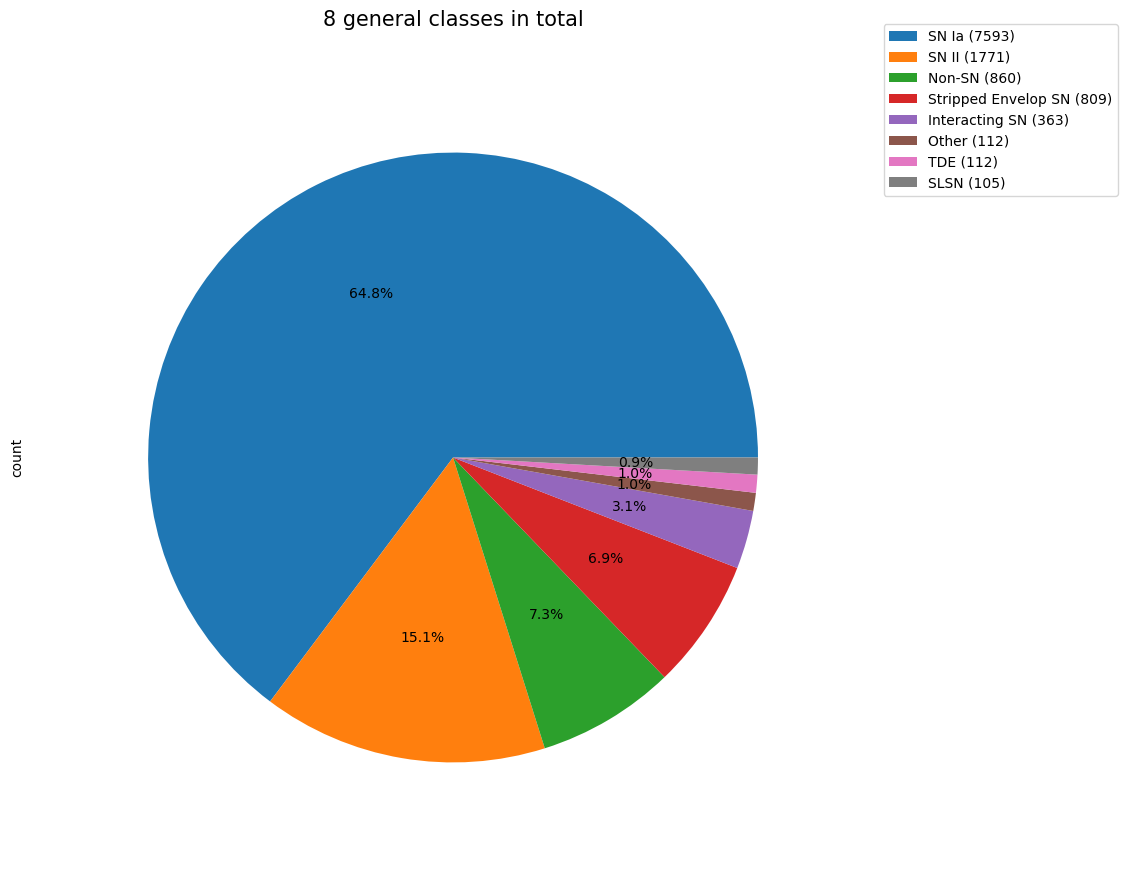

In [39]:

# Get unique object types and their counts
obj_type_counts = spectra_info['big_class'].value_counts()

# Plot pie chart
ax = obj_type_counts.plot.pie(figsize=(11, 11), labeldistance=None, autopct='%1.1f%%', radius=0.9)

# Construct legend labels with counts
legend_labels = [f'{obj_type} ({count})' for obj_type, count in zip(obj_type_counts.index, obj_type_counts)]

# Add legend
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc='upper left')

# Set title
ax.set_title('%s general classes in total' % (str(len(set(spectra_info['big_class'])))), fontsize=15)

plt.show()

### 2. Redshift distribution
The redshift distribution among the dataset/class.

(Even we don't consider the redshift, it could be helpful to estimate the performance later. :) )

Redshift distribution among big classes.

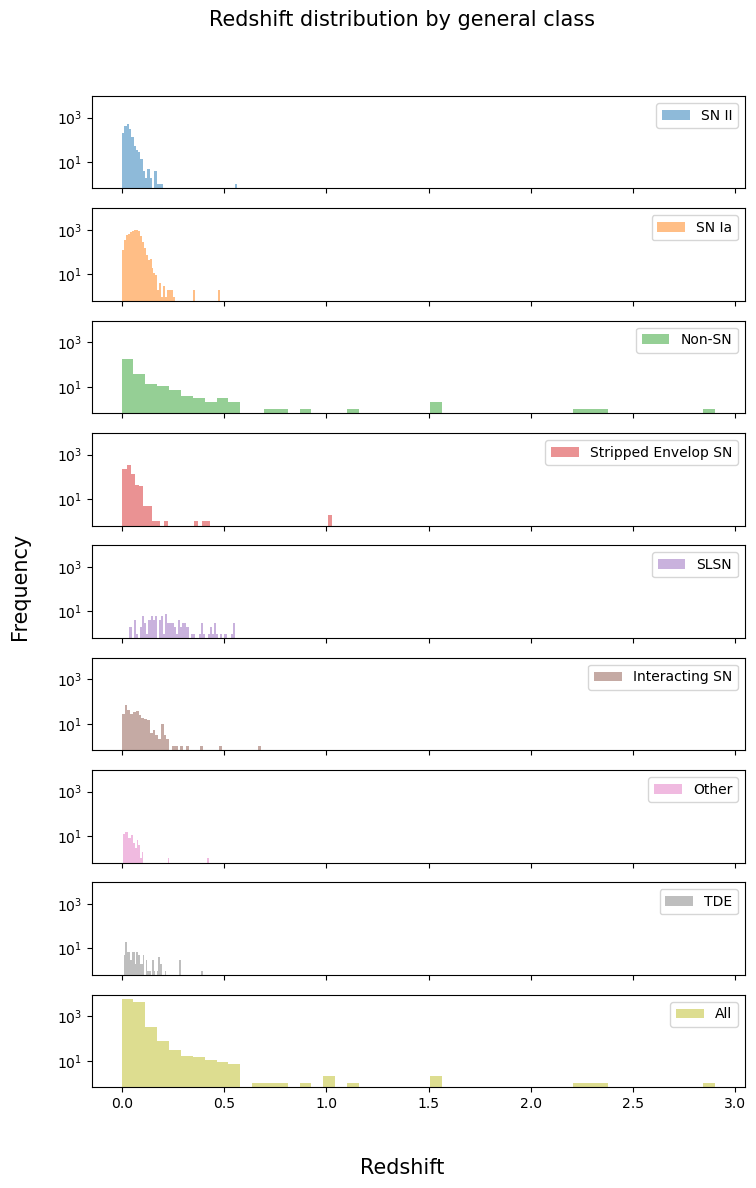

In [40]:
# Get unique labels
unique_labels = spectra_info['big_class'].unique()

# Plotting histograms by label
fig, axs = plt.subplots(len(unique_labels)+1, figsize=(8, 12), sharex=True, sharey=True)

# Define colors for each label
colors = plt.cm.tab10.colors[:len(unique_labels)+1]

for i, (label, color) in enumerate(zip(unique_labels, colors)):
    ax = axs[i] if len(unique_labels) > 1 else axs
    spectra_info[spectra_info['big_class'] == label]['Redshift'].plot(kind='hist', ax=ax, alpha=0.5, bins=50, label = label, color = color)
    ax.legend()
    ax.set_yscale('log')
    ax.set_ylabel('')

ax = axs[-1]
spectra_info['Redshift'].plot(kind='hist', ax=ax, alpha=0.5, bins=50, label = 'All', color = colors[-1])
ax.legend()
ax.set_yscale('log')
ax.set_ylabel('')

# Adding labels and title
fig.text(0.5, 0.01, 'Redshift', ha='center', fontsize = 15)
fig.text(0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
plt.suptitle('Redshift distribution by general class', fontsize = 15)
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
# plt.tight_layout()
plt.show()

### 3.  Spectra resolution/instrument summary
Spectra resolution/instrument distribution.

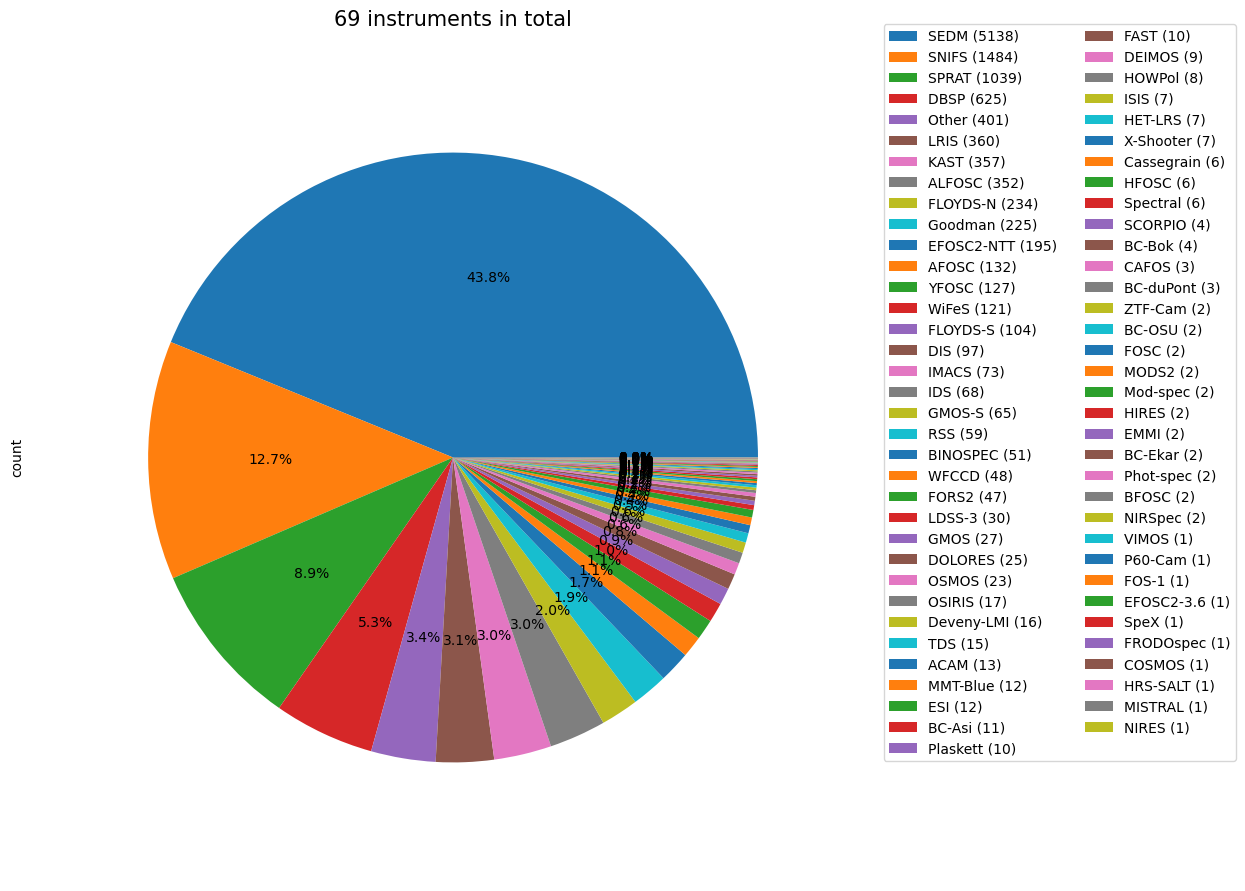

In [41]:
# Get unique instruments and their counts
instrument_counts = spectra_info['Instrument'].value_counts()

# Plot pie chart
ax = instrument_counts.plot.pie(figsize=(11, 11), labeldistance=None, autopct='%1.1f%%', radius=0.9)

# Construct legend labels with counts
legend_labels = [f'{instrument} ({count})' for instrument, count in zip(instrument_counts.index, instrument_counts)]

# Add legend with two columns
ax.legend(legend_labels, bbox_to_anchor=(1, 1.02), loc='upper left', ncol=2)

# Set title
ax.set_title('%s instruments in total' % (str(len(set(spectra_info['Instrument'])))), fontsize=15)

plt.show()


For each big class, how the intruments are distributed? This might be helpful for the potential bias of performance analysis.

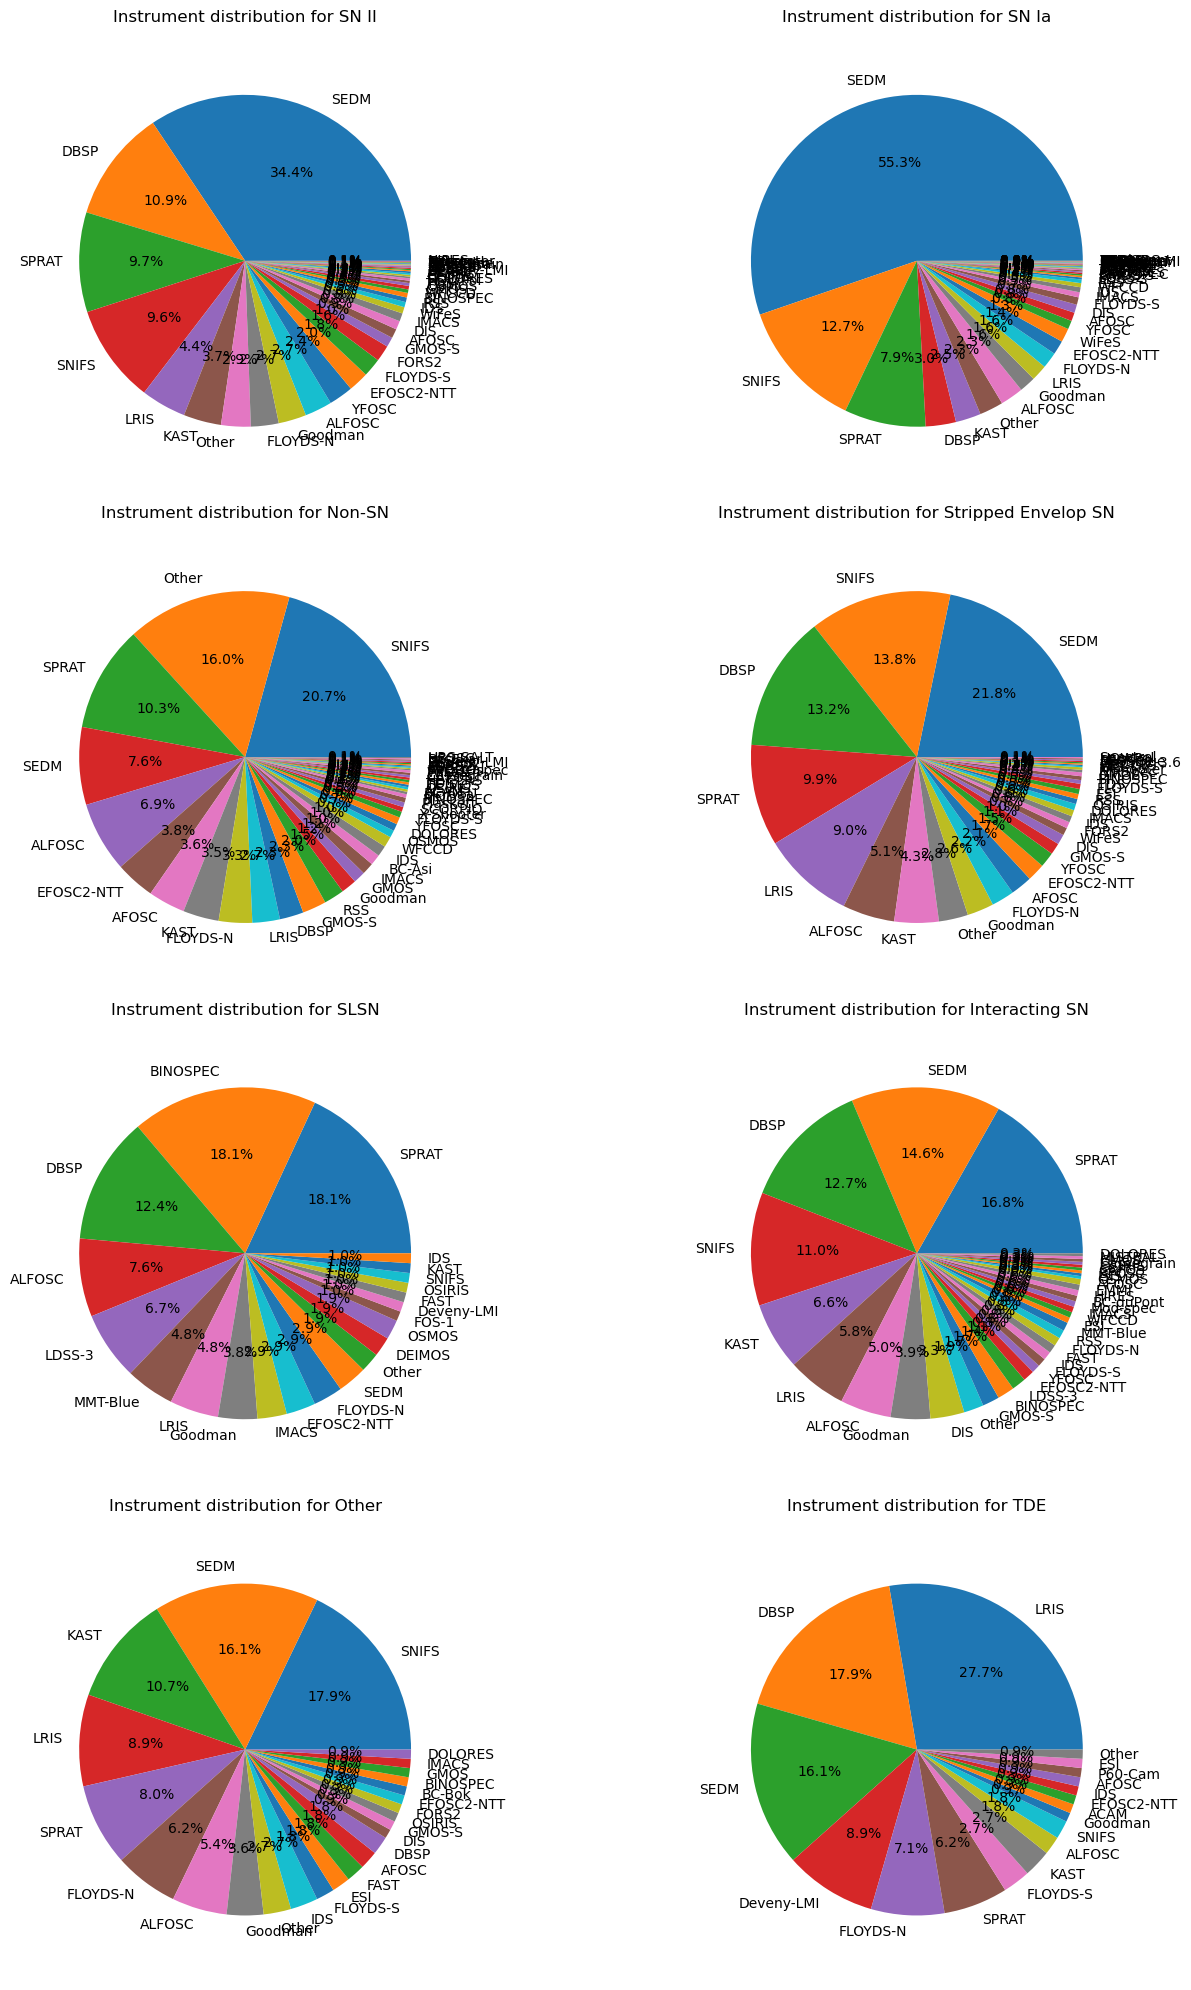

In [42]:
# Get unique object types
unique_obj_types = spectra_info['big_class'].unique()

# Calculate the number of rows and columns for subplots
num_plots = len(unique_obj_types)
num_cols = 2  # You may adjust this according to your preference
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Empty lists to accumulate legend handles
legend_handles = []

# Iterate over each Obj_Type and plot instrument distribution
for i, obj_type in enumerate(unique_obj_types):
    # Filter DataFrame for the current Obj_Type
    obj_type_df = spectra_info[spectra_info['big_class'] == obj_type]
    
    # Group by Instrument and calculate counts
    instrument_counts = obj_type_df['Instrument'].value_counts()
    
    # Plot pie chart
    ax = axes[i // num_cols, i % num_cols] if num_plots > 1 else axes
    pie = instrument_counts.plot.pie(ax=ax, autopct='%1.1f%%', radius=0.9)
    ax.set_title(f'Instrument distribution for {obj_type}')
    ax.set_ylabel('')  # Remove y-labels
    
    # Accumulate legend handles
    for label in instrument_counts.index:
        if label not in legend_handles:
            legend_handles.append(pie.patches[0])  # Assuming all pies have the same number of patches

# Create legend with custom handles and labels
legend_labels = spectra_info['Instrument'].unique()
# fig.legend(legend_handles, legend_labels, loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


### *P.S. I would like to remove some low number instrument samples, but also think their R and wavelength range might be similar to those with high frequencies, so leave it there to next stage.*

### 4. Spectra dispersion, length, and wavelength range.
A heatmap of spectra length and wavelength range could be helpful.

### Read the data

In [43]:
data = np.load('all_TNS_spectra/all_spectra.npy', allow_pickle=True).item()
spectra_names = list(data.keys())
for i in spectra_names:
    c1 = str(i).strip('all_TNS_spectra/data_spectra/')
    data[c1] = data.pop(i) #.strip('_TNS*')
spectra_names = list(data.keys())
# spectra_names

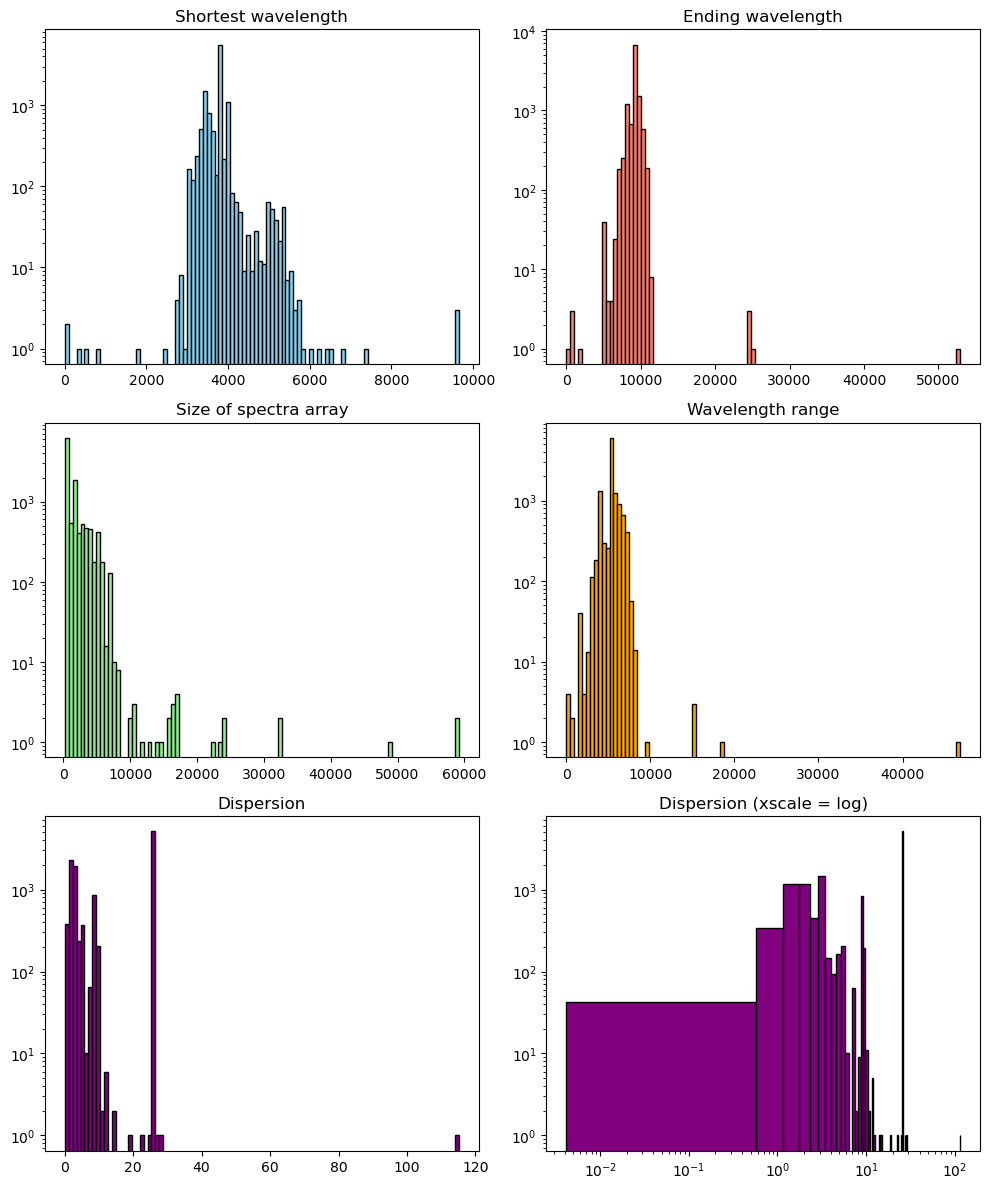

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Plot histograms in each subplot
shortest_ws = [np.min(data[x]['w']) for x in data.keys()]
axs[0, 0].hist(shortest_ws, bins=100, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Shortest wavelength')
axs[0, 0].set_yscale('log')

longest_ws = [np.max(data[x]['w']) for x in data.keys()]
axs[0, 1].hist(longest_ws, bins=100, color='salmon', edgecolor='black')
axs[0, 1].set_title('Ending wavelength')
axs[0, 1].set_yscale('log')

size_ws = [data[x]['w'].size for x in data.keys()]
axs[1, 0].hist(size_ws, bins=100, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Size of spectra array')
axs[1, 0].set_yscale('log')

cover_ws = [(np.max(data[x]['w'])-np.min(data[x]['w']))  for x in data.keys()]
axs[1, 1].hist(cover_ws, bins=100, color='orange', edgecolor='black')
axs[1, 1].set_title('Wavelength range')
axs[1, 1].set_yscale('log')

dispersion_ws = [(np.max(data[x]['w'])-np.min(data[x]['w']))/data[x]['w'].size  for x in data.keys()]
axs[2, 0].hist(dispersion_ws, bins=100, color='purple', edgecolor='black')
axs[2, 0].set_title('Dispersion')
axs[2, 0].set_yscale('log')

# Hide the empty subplot
dispersion_ws = [(np.max(data[x]['w'])-np.min(data[x]['w']))/data[x]['w'].size  for x in data.keys()]
axs[2, 1].hist(dispersion_ws, bins=200, color='purple', edgecolor='black')
axs[2, 1].set_title('Dispersion (xscale = log)')
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
print('The min, mean, median of dispersion are %f, %f and %f.\n'%(np.min(dispersion_ws), np.mean(dispersion_ws), np.median(dispersion_ws)))

The min, mean, median of dispersion are 0.004141, 13.368237 and 9.178753.



At this stage, do some cuts for the heatmap plot. (might be helpful for preprocessing part...?)
1. Ending wavelength < 20000
2. Starting wavelngth > 2000 and < 6000
3. Size of array < 20000 and > 1000
4. Coverage length < 10000
5. dispersion < 30
<!-- 6. Minimal dispersion for plotting == 1 -->


In [46]:

plot_data = {}
for x in data.keys():
    if np.max(data[x]['w']) < 20000 and np.min(data[x]['w']) < 6000 and np.min(data[x]['w']) > 2000 and data[x]['w'].size < 20000 and np.max(data[x]['w']) - np.min(data[x]['w']) < 10000 and np.max(data[x]['w']) - np.min(data[x]['w']) > 1000 and (np.max(data[x]['w']) - np.min(data[x]['w']))/data[x]['w'].size < 30:
        plot_data[x] = data[x]['w']

print('%d samples are left, %d are removed.\n' % (len(plot_data.keys()), len(data.keys()) - len(plot_data.keys())))

11447 samples are left, 22 are removed.



In [47]:
import re

file_names = spectra_info['Ascii_file'].apply(lambda x: '_'.join([x[2:].split('_')[0], x[2:].split('_')[1]])).values
file_names

array(['2023gkb_2023-05-19', '2023gjt_2023-05-09', '2023gjg_2023-04-23',
       ..., '2023bfq_2023-02-10', '2023bfb_2023-02-02',
       '2023bfa_2023-02-12'], dtype=object)

In [48]:
# match big class
big_class_obj_dict = {}
missing_obj = []
for x in plot_data.keys():
    x1 = '_'.join([x.split('_')[0], x.split('_')[1]])
    x2 = '_'.join([x.split('_')[0], x.split('_')[1]])[2:]
    if x1 in file_names:
        idx = np.where(file_names==x1)
        big_class_obj_dict[x] = spectra_info['big_class'].values[idx][0]
    elif x2 in file_names:
        idx = np.where(file_names==x2)
        big_class_obj_dict[x] = spectra_info['big_class'].values[idx][0]
    else:
        print('%s no found.\n' % (x))
        missing_obj.append(x)

for m in missing_obj:
    plot_data.pop(m) 
len(big_class_obj_dict.keys())

AT2023com_2023-02-27_00-53-45_NOT_ALFOSC no found.

2023com_2023-03-29_05-40-12_P60_SEDM no found.

AT2023wuk_2023-11-07_22-57-19_NOT_ALFOSC_TNS.tx no found.



11444

The missing files are Computed-Ia.

In [60]:
# create a new df

sns_data = []
for x in plot_data.keys():
    obj_dict = {'spectra_name': x, 'shortest_wavelength': "{:.1f}".format(np.min(plot_data[x])), 'wavelength_range': "{:.1f}".format(np.max(plot_data[x])-np.min(plot_data[x])), 'size': plot_data[x].size, 'dispersion': "{:.3f}".format((np.max(plot_data[x])-np.min(plot_data[x]))/plot_data[x].size), 'class': big_class_obj_dict[x]  }
    sns_data.append(obj_dict)
sns_df = pd.DataFrame(sns_data)

sns_df = sns_df.apply(pd.to_numeric, errors = 'ignore')
sns_df


,spectra_name,shortest_wavelength,wavelength_range,size,dispersion,class
0,2022io_2022-01-11_00-09-00_Ekar_AFOSC,3407.3,4797.9,1023,4.690,SN Ia
1,2023ung_2023-10-10_20-32-00_Other_Oth,4005.5,3991.6,424,9.414,SN Ia
2,2019qj_2019-01-13_02-55-14_UH88_SNIF,3305.1,6392.0,3197,1.999,SN Ia
3,2022bqt_2022-02-10_05-43-26_UH88_SNIF,3402.9,5697.0,1900,2.998,Stripped Envelop SN
4,2019rx_2019-01-15_21-36-00_Ekar_AFOSC,3398.6,4797.9,1023,4.690,SN Ia
...,...,...,...,...,...,...
11439,AT2023ufj_2023-10-12_17-43-50_Other_Oth,3898.9,3492.0,3493,1.000,Non-SN
11440,AT2023ypg_2023-12-02_15-34-03_Other_Oth,3726.1,3675.0,3602,1.020,Non-SN
11441,AT2023tmh_2023-09-27_20-01-42_Other_Oth,3755.4,3598.0,3599,1.000,Non-SN
11442,AT2024amp_2024-01-19_20-36-04_Other_Oth,3803.8,3594.5,415,8.661,Non-SN


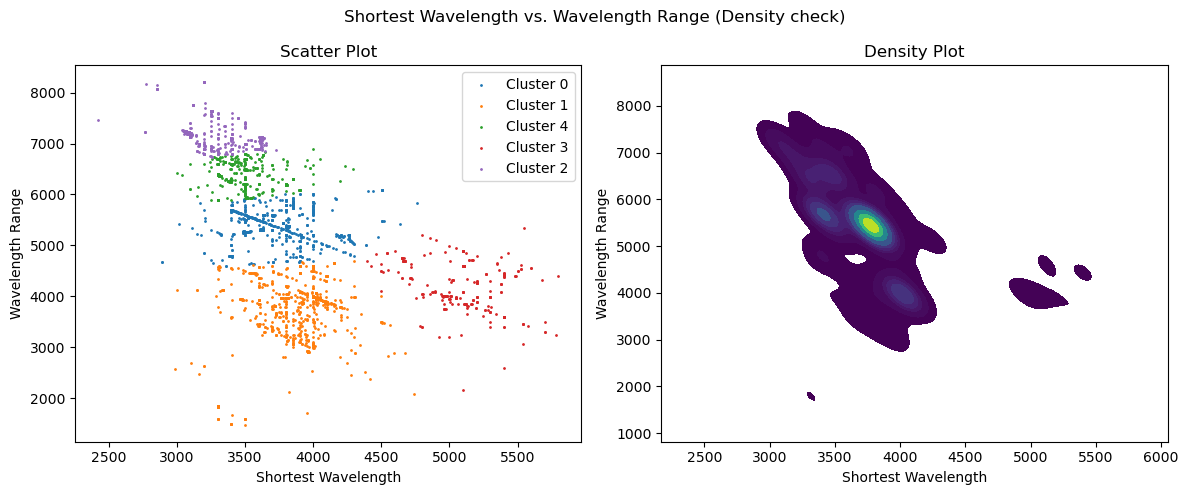

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original scatter plot on the first subplot
# Fit KMeans clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
sns_df['cluster'] = kmeans.fit_predict(sns_df[['shortest_wavelength', 'wavelength_range']])

# Get unique cluster labels
unique_clusters = sns_df['cluster'].unique()

# Plot each cluster separately
for cluster_label in unique_clusters:
    cluster_data = sns_df[sns_df['cluster'] == cluster_label]
    axes[0].scatter(cluster_data['shortest_wavelength'], cluster_data['wavelength_range'], label=f'Cluster {cluster_label}', s = 1)


# axes[0].scatter(df_result['starting_w'], df_result['length'], color='gray', s=1)
axes[0].set_xlabel('Shortest Wavelength')
axes[0].set_ylabel('Wavelength Range')
axes[0].set_title('Scatter Plot')
axes[0].legend()

# KDE plot on the second subplot
sns.kdeplot(data=sns_df, x='shortest_wavelength', y='wavelength_range', cmap='viridis', fill=True, bw_adjust=1.2, ax=axes[1])
axes[1].set_xlabel('Shortest Wavelength')
axes[1].set_ylabel('Wavelength Range')
axes[1].set_title('Density Plot')

# Add a title for the entire figure
fig.suptitle('Shortest Wavelength vs. Wavelength Range (Density check)')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()




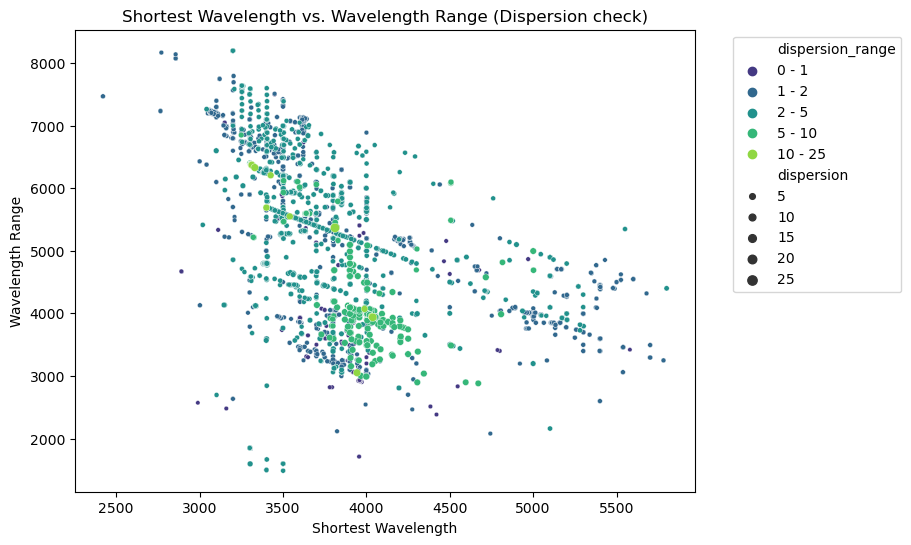

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

sns_df = sns_df.sort_values('dispersion')
# Define dispersion ranges and corresponding colors
dispersion_ranges = [(0, 1), (1, 2), (2, 5), (5, 10), (10, 25)]
colors = sns.color_palette('viridis', n_colors=len(dispersion_ranges))

# Function to assign dispersion range category
def get_dispersion_range_category(dispersion):
    for i, (start, end) in enumerate(dispersion_ranges):
        if start <= dispersion <= end:
            return f"{start} - {end}"

# Add a new column with dispersion range category
sns_df['dispersion_range'] = sns_df['dispersion'].apply(get_dispersion_range_category)

# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot with dispersion ranges as colors
scatter = sns.scatterplot(data=sns_df, x='shortest_wavelength', y='wavelength_range', hue='dispersion_range', palette=colors , size='dispersion', sizes=(10, 50), alpha=1)

# Set labels and title
plt.xlabel('Shortest Wavelength')
plt.ylabel('Wavelength Range')
plt.title('Shortest Wavelength vs. Wavelength Range (Dispersion check)')

# Adjust legend
scatter.legend(markerscale=1,  bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


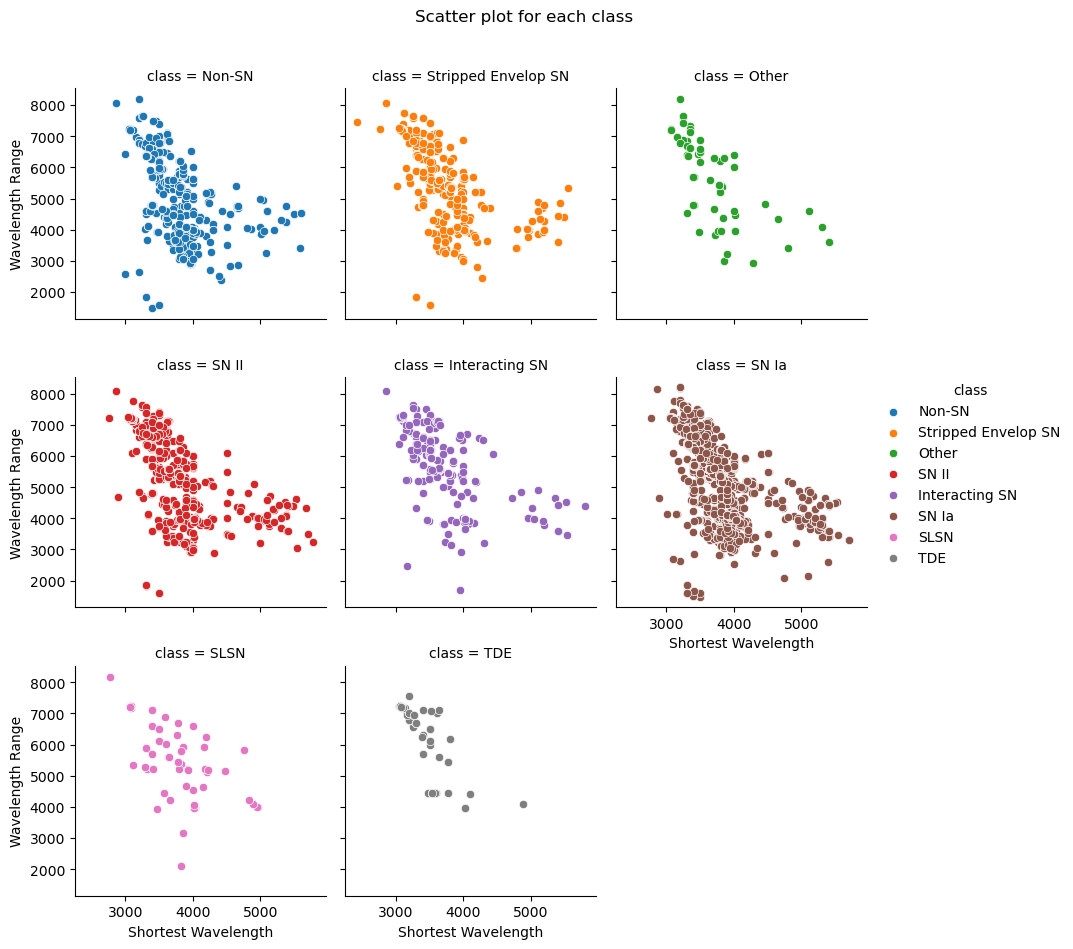

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a FacetGrid with a scatter plot for each class
g = sns.FacetGrid(sns_df, col='class', hue='class', col_wrap=3)
g.map(sns.scatterplot, 'shortest_wavelength', 'wavelength_range')

# Set labels and title
g.set_axis_labels('Shortest Wavelength', 'Wavelength Range')
g.fig.suptitle('Scatter plot for each class', y=1.05)

# Add legend
g.add_legend()

# Show plot
plt.show()


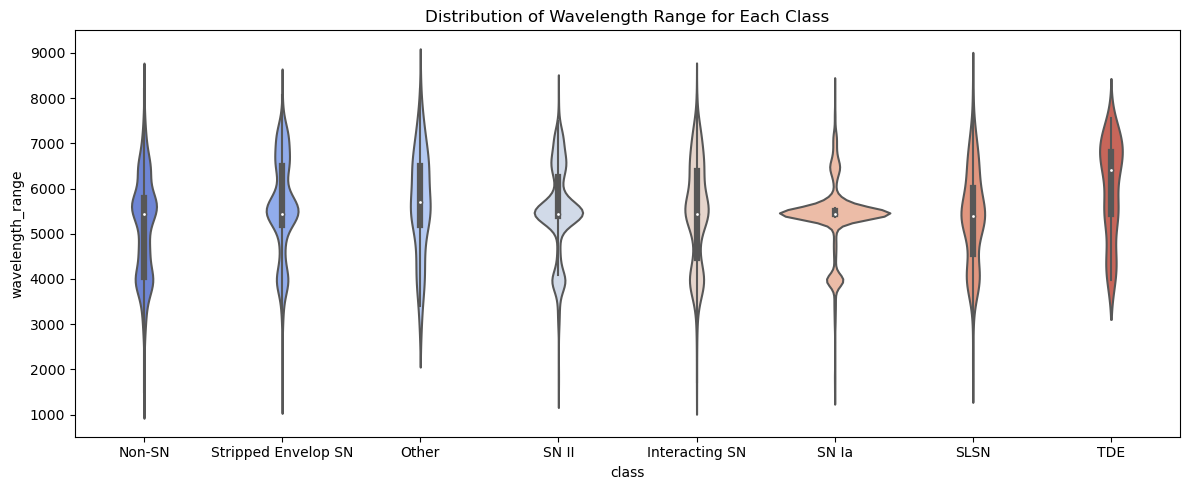

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with the specified size
plt.figure(figsize=(12, 5))

# Create violin plot: length vs. class
sns.violinplot(data=sns_df, x='class', y='wavelength_range', palette='coolwarm')

# Set the title of the plot
plt.title('Distribution of Wavelength Range for Each Class')

# Adjust layout to ensure no overlap
plt.tight_layout()

# Display the plot
plt.show()


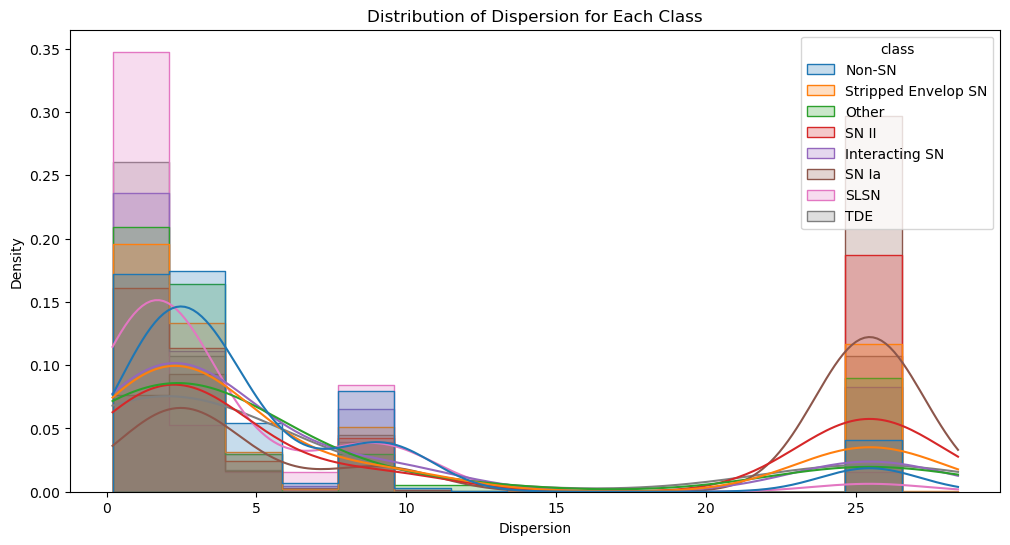

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(data=sns_df, x='dispersion', hue='class', kde=True, element='step', stat='density', common_norm=False)

# Customize the plot
plt.title('Distribution of Dispersion for Each Class')
plt.xlabel('Dispersion')
plt.ylabel('Density')

# Show the plot
plt.show()
